# Launch training

In [ ]:
import sys
training_src_path = '/home/poulpos/pigs/animal-spot/TRAINING'
sys.path.insert(1, training_src_path)

In [ ]:
import os
from start_training import setup_training
trainer = setup_training(os.path.join(training_src_path, "config"))
trainer.init_logger()
trainer.read_config()
trainer.start_training()

# Learning infos

In [1]:
import pandas as pd

In [3]:
def read_log(file, start_line=1):
    with open(file) as f:
        lines = [line.rstrip() for i, line in enumerate(f) if i >= start_line - 1]
    df = pd.DataFrame(columns=["type", "epoch", "loss","tp","tn","fp","fn","accuracy","f1","precision","TPR","FPR","t"])
    for line in lines:
        current = {}
        infos = line.split("|")
        if len(infos) >= 2 and infos[1] == "D":
            continue
        if len(infos) < 5:
            print(f"Can't understand the following line\n  {line}")
        current["type"] = infos[2]
        current["epoch"] = infos[3]
        for i in range(4, len(infos)):
            vv = infos[i].split(":")
            if len(vv) != 2:
                print(f"line {line} rank {i}")
                continue
            [var, val] = vv
            current[var] = float(val)
        row = pd.DataFrame(data={k:[v] for k,v in current.items() if k != "lr"})
        df = pd.concat([df, row], ignore_index=True)
    return df



In [4]:
train_df = read_log("/home/poulpos/pigs/log/TRAIN-nw12.log", start_line=141)

/tmp/ipykernel_44078/4158613144.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, row], ignore_index=True)


In [5]:
train_df.head()

type epoch   loss      tp      tn    fp    fn  accuracy     f1  precision  \
0  train    23  0.020  5005.0  7181.0  44.0  42.0     0.993  0.991      0.991   
1  train    24  0.019  5008.0  7182.0  44.0  38.0     0.993  0.992      0.991   
2    val    24  0.017  1081.0  1601.0  16.0   2.0     0.993  0.992      0.985   
3  train    25  0.022  5012.0  7173.0  50.0  37.0     0.993  0.991      0.990   
4  train    26  0.017  5009.0  7184.0  42.0  37.0     0.994  0.992      0.992   

     TPR    FPR       t  
0  0.992  0.006  1831.7  
1  0.992  0.006  1874.8  
2  0.998  0.010   120.0  
3  0.993  0.007  1779.4  
4  0.993  0.006  1766.7

In [6]:
import matplotlib.pyplot as plt

<Axes: xlabel='epoch'>

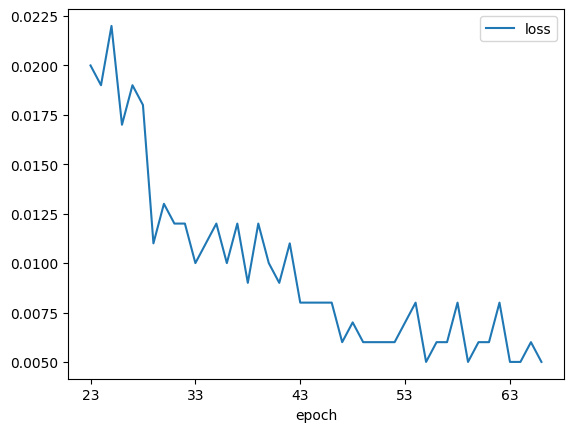

In [7]:
train_df[train_df["type"] == "train"].plot(x="epoch", y="loss")

<Axes: xlabel='epoch'>

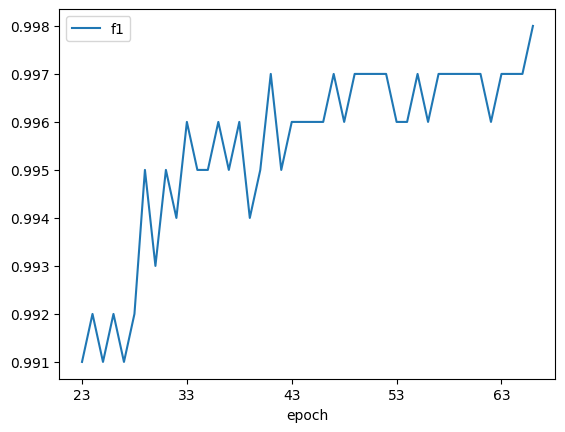

In [8]:
train_df[train_df["type"] == "train"].plot(x="epoch", y="f1")

<Axes: >

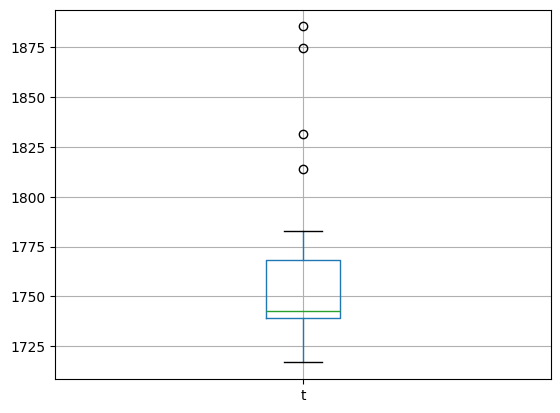

In [9]:
train_df[train_df["type"] == "train"].boxplot(column="t")

<Axes: xlabel='epoch'>

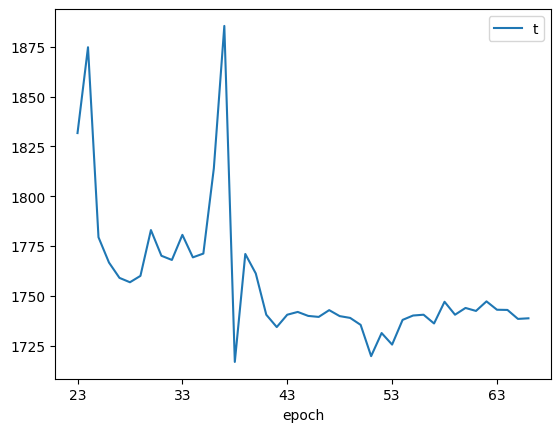

In [10]:
train_df[train_df["type"] == "train"].plot(x="epoch", y="t")

In [116]:
from datetime import timedelta
print(timedelta(seconds=1700))

0:28:20


## Prediction

In [1]:
import sys
prediction_src_path = '/home/poulpos/pigs/animal-spot/PREDICTION'
sys.path.insert(1, prediction_src_path)

In [2]:
from start_prediction import setup_prediction
predicter = setup_prediction("/home/poulpos/pigs/animal-spot/PREDICTION/config")
predicter.init_logger()
predicter.read_config()
predicter.start_prediction()

ModuleNotFoundError: No module named 'start_prediction'

### Label track

In [3]:
import pandas as pd
def read_output(file, start_line=1):
    with open(file) as f:
        lines = [line.rstrip() for i, line in enumerate(f) if i >= start_line  - 1]
    df = pd.DataFrame(columns=["start", "end", "proba"])
    for line in lines:
        current = {}
        infos = line.split("|")
        if len(infos) >= 2 and infos[1] == "D":
            continue
        if len(infos) < 3:
            print(f"Can't understand the following line\n  {line}")
        infos = [e.strip() for e in infos[2].split(",")]
        for varval in infos:
            [var, val] = varval.split("=")
            if var == "time":
                [start, end] = val.split("-")
                current['start'] = float(start)
                current['end'] = float(end)
            elif var == "prob":
                current['proba'] = float(val)
        row = pd.DataFrame(data={k:[v] for k,v in current.items() if k != "lr"})
        df = pd.concat([df, row], ignore_index=True)
    return df


In [14]:
df = read_output("/home/poulpos/pigs/output/short_predict_output.log", start_line=12)

/tmp/ipykernel_44078/3205541428.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, row], ignore_index=True)


In [15]:
df.head()

start  end     proba
0    0.0  0.5  0.008074
1    0.2  0.7  0.036273
2    0.4  0.9  0.020106
3    0.6  1.1  0.027159
4    0.8  1.3  0.006707

<Axes: xlabel='start'>

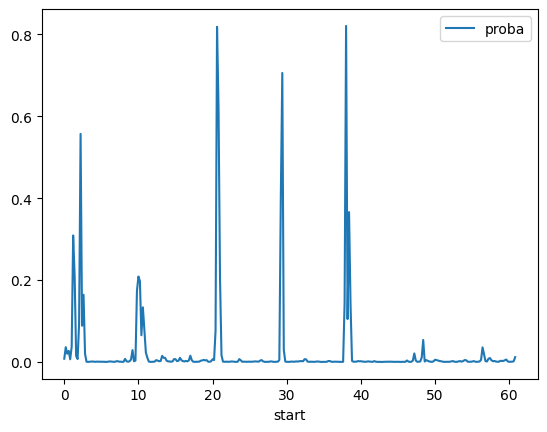

In [16]:
df.plot(x="start", y="proba")

In [28]:
import os
import matplotlib.pyplot as plt
import librosa
import numpy as np
pigs_dir = "/home/poulpos/pigs/"
origin = "short4"
output = os.path.join(pigs_dir, "output", origin + "_predict_output.log")
wave = os.path.join(pigs_dir, "tests", origin + ".wav")

In [29]:
pred_df = read_output(output, start_line=12)

/tmp/ipykernel_2377/3205541428.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, row], ignore_index=True)


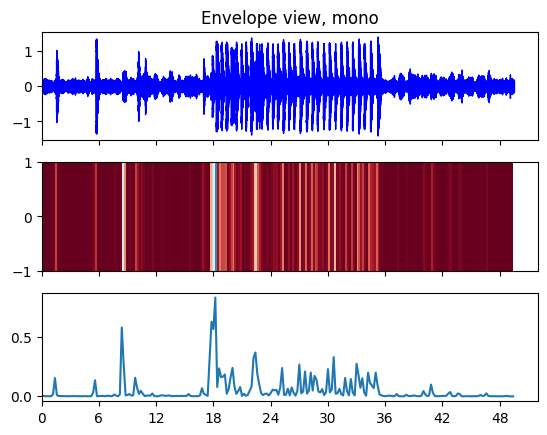

In [30]:
y, sr = librosa.load(wave)
fig, ax = plt.subplots(nrows=3, sharex=True)
librosa.display.waveshow(y, sr=sr, ax=ax[0], color="blue")
ax[0].set(title='Envelope view, mono')
ax[0].label_outer()
xx = np.arange(0, len(y)/sr, 0.2)
yy = np.array([-1, 1])
proba = np.array([pred_df["proba"]])
proba = np.concatenate((proba, np.zeros((1,xx.shape[0] - proba.shape[1]-1))), axis=1)
ax[1].pcolormesh(xx, yy, proba, cmap='RdBu', vmin=0, vmax=1)
proba = np.concatenate((proba[0], np.array([0])))
ax[2].plot(xx, proba)
plt.show()

In [10]:
np.array([0]).shape

(1,)

proba[0].shape